In [1]:
# Dependencies
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import json
import numpy as np
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [3]:
# Twitter credentials
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:
# Create columns for dataframe
sentiments = {'Tweet Number': '',
              'News Organization': '',
              'Tweet': '',
              'Compound Score': '',
              'Positive Score': '',
              'Negative Score': '',
              'Neutral Score': ''}

In [5]:
# Create list of news accounts
target_terms = ['@BBC', '@CBS', '@CNN', '@FoxNews', '@nytimes']

In [6]:
# Variable to hold list of the compound sentiment
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_number = []
text = []
news_source = []

# Loop through all target users
for target in target_terms:
        
    # Run search around each tweet
    screen_name = target
    public_tweets = api.user_timeline(target,
                                      count=100)
    
    # Index to see how many tweets for each news source
    index = 0
        
    # Loop through all tweets
    for tweet in public_tweets:
        
        news_organization = target
            
        # Run vader analysis on each tweet
        scores = analyzer.polarity_scores(tweet['text'])
        compound = scores['compound']
        pos = scores['pos']
        neu = scores['neu']
        neg = scores['neg']
            
        # Add value to list
        compound_list.append(compound)
        positive_list.append(pos)
        negative_list.append(neg)
        neutral_list.append(neu)
        text.append(tweet['text'])
        tweet_number.append(index)
        news_source.append(news_organization)
        
        index = index + 1

In [7]:
# Add values from list to dataframe
sentiments['Tweet Number'] = tweet_number
sentiments['News Organization'] = news_source
sentiments['Tweet'] = text
sentiments['Compound Score'] = compound_list
sentiments['Positive Score'] = positive_list
sentiments['Negative Score'] = negative_list
sentiments['Neutral Score'] = neutral_list

sentiments_df = pd.DataFrame(sentiments)
sentiments_df.to_csv('sentimentsnewsmedia.csv')
sentiments_df

,Compound Score,Negative Score,Neutral Score,News Organization,Positive Score,Tweet,Tweet Number
0,0.0000,0.000,1.000,@BBC,0.000,🏃🏻‍♂️ Take a #parkour tour of Glasgow with Sco...,0
1,-0.5526,0.251,0.656,@BBC,0.093,RT @BBCSport: Stop EVERYTHING you are doing! ✋...,1
2,-0.4019,0.150,0.773,@BBC,0.077,RT @bbceastenders: “I realised what an importa...,2
3,-0.4767,0.221,0.674,@BBC,0.105,"RT @bbcthree: ""He was stabbed eleven times in ...",3
4,-0.6486,0.301,0.699,@BBC,0.000,RT @BBCNews: Steve Ditko: Spider-Man co-creato...,4
5,-0.3400,0.160,0.738,@BBC,0.102,"Seven years after her death, these previously ...",5
6,-0.3818,0.178,0.822,@BBC,0.000,Yassine scavenged on the dump for eight years....,6
7,-0.3570,0.115,0.885,@BBC,0.000,😺🐾 They sweat through their paws and can't tas...,7
8,0.0000,0.000,1.000,@BBC,0.000,🎶 It's coming home 🎶\n\n@Baddiel and @FrankOnT...,8
9,-0.4019,0.403,0.597,@BBC,0.000,😂 How annoying is this? https://t.co/Z2vtjhPZXH,9


In [8]:
# Get timestamp
present_date = time.strftime("%m/%d/%Y")
present_date

'07/07/2018'

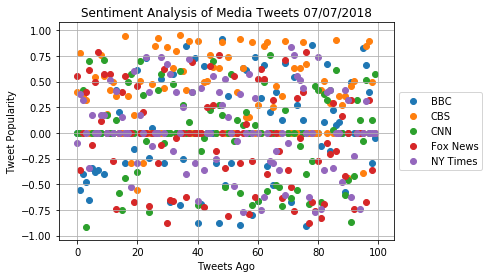

In [9]:
# Create dataframe for each news source and plot
bbc_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@BBC']
plt.scatter(bbc_compound_df['Tweet Number'], bbc_compound_df['Compound Score'], label='BBC')

cbs_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CBS']
plt.scatter(cbs_compound_df['Tweet Number'], cbs_compound_df['Compound Score'], label='CBS')

cnn_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@CNN']
plt.scatter(cnn_compound_df['Tweet Number'], cnn_compound_df['Compound Score'], label='CNN')

foxnews_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@FoxNews']
plt.scatter(foxnews_compound_df['Tweet Number'], foxnews_compound_df['Compound Score'], label='Fox News')

nytimes_compound_df = sentiments_df.loc[sentiments_df['News Organization'] == '@nytimes']
plt.scatter(nytimes_compound_df['Tweet Number'], nytimes_compound_df['Compound Score'], label='NY Times')

plt.title(f'Sentiment Analysis of Media Tweets {present_date}')
plt.xlabel('Tweets Ago')
plt.ylabel('Tweet Popularity')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.savefig('CompoundNewsMedia.png')
plt.show()

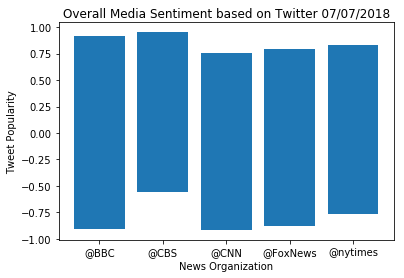

In [11]:
# Plot average sentiment compound of each source# Plot av 
# Reset index
updated_sentiments_df = sentiments_df.reset_index()

plt.bar(updated_sentiments_df['News Organization'], updated_sentiments_df['Compound Score'])
plt.title(f'Overall Media Sentiment based on Twitter {present_date}')
plt.xlabel('News Organization')
plt.ylabel('Tweet Popularity')
plt.savefig('AvgCompoundNewsMedia.png')
plt.show()